In [50]:
import re
import pandas as pd

data = pd.read_csv('51f7ab6a-24ed-4a06-9f5d-04873f1673fd_Series - Metadata-1.csv', encoding='latin1')
data

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,68.0408782958984,89.5,71.5,97.7,97.7,93.4308776855469,97.7,97.7,97.7,..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,60.2391977225107,86.5005116269173,64.5733543829493,97.0993598284929,97.0919732482142,91.6060600230095,97.0756269501314,97.0667125932952,97.0572022178384,..
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,0.29808781267706,0.283692395910162,0.297971774718822,0.268358772656602,0.281195815732375,0.299082634225993,0.297563650500103,0.223478872007068,..,..
3,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,5.60074465808174,2.72454336394887,1.45131466009762,2.26031420130457,2.6470032019574,1.18922812838036,3.91160341942292,-2.3511006734461,-20.7388393676343,..
4,Afghanistan,AFG,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,0.170626997947693,..,..,..,..,..,...,0.53,0.5,0.5,0.5,0.39,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,EG.ELC.ACCS.RU.ZS,CC BY-4.0,"Access to electricity, rural (% of rural popul...","Access to electricity, rural is the percentage...","IEA, IRENA, UNSD, World Bank, WHO. 2023. Track...",Environment: Energy production & use,Annual,Weighted average,The World Banks Global Electrification Databa...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,EN.ATM.CO2E.PC,Attribution-NonCommercial 4.0 International (C...,CO2 emissions (metric tons per capita),Carbon dioxide emissions are those stemming fr...,Emissions data are sourced from Climate Watch ...,Environment: Emissions,Annual,Weighted average,"Carbon dioxide emissions, largely by-products ...",Carbon dioxide (CO2) is naturally occurring ga...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1605,NY.GDP.MKTP.KD.ZG,CC BY-4.0,GDP growth (annual %),Annual percentage growth rate of GDP at market...,"World Bank national accounts data, and OECD Na...",Economic Policy & Debt: National accounts: Gro...,Annual,Weighted average,Gross domestic product (GDP) represents the su...,An economy's growth is measured by the change ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1606,SH.MED.BEDS.ZS,CC BY-4.0,"Hospital beds (per 1,000 people)",Hospital beds include inpatient beds available...,"Data are from the World Health Organization, s...",Health: Health systems,Annual,Weighted average,Health systems - the combined arrangements of ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data_peru = data[data['Country Name'] == 'Peru']
data_peru

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
924,Peru,PER,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,92.135365,92.919989,93.852179,94.2,94.8,95.2,95.551360223182,96.2,95.6,..
925,Peru,PER,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,69.9050114897088,72.7675028572342,76.692689134919,77.9748393653812,80.4978448676186,81.7999810536238,82.9478253388103,86.0985574555857,83.5511622295803,..
926,Peru,PER,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,1.65625408117878,1.75159405113357,1.7763005780535,1.8263804846975,1.71724301281113,1.69513088210562,1.73564177469023,1.39856601861908,..,..
927,Peru,PER,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,7.34709633145569,10.0352933342212,4.32824981844591,6.54786765047102,5.62173344947736,...,5.85251821084928,2.38215737180541,3.25224477218451,3.95331871520767,2.51883544233135,3.969351341365,2.24063176875049,-10.8696407826493,13.4175302909947,2.68387143477631
928,Peru,PER,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,2.41143894195557,..,..,..,..,..,...,1.51,1.56,1.55,1.59,1.59,..,..,..,..,..
929,Peru,PER,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,..,..,..,..,..,..,...,45.8711092036968,45.804310150231,45.4276000599438,45.7818223870905,45.9158254902167,46.1114156983427,46.1284202883485,44.2865347211395,45.975899260784,46.7458159089724


In [42]:
import matplotlib.pyplot as plt

electricity_data_peru = data_peru[data_peru['Series Name'] == 'Access to electricity (% of population)']

electricity_data_peru = electricity_data_peru.drop(columns=['Country Name', 'Country Code', 'Series Name', 'Series Code']).T

electricity_data_peru

,924
1960 [YR1960],..
1961 [YR1961],..
1962 [YR1962],..
1963 [YR1963],..
1964 [YR1964],..
...,...
2018 [YR2018],95.2
2019 [YR2019],95.551360223182
2020 [YR2020],96.2
2021 [YR2021],95.6


In [43]:
electricity_data_peru = electricity_data_peru.dropna()

electricity_data_peru.index = electricity_data_peru.index.str.extract('(\d+)')[0].astype(int)


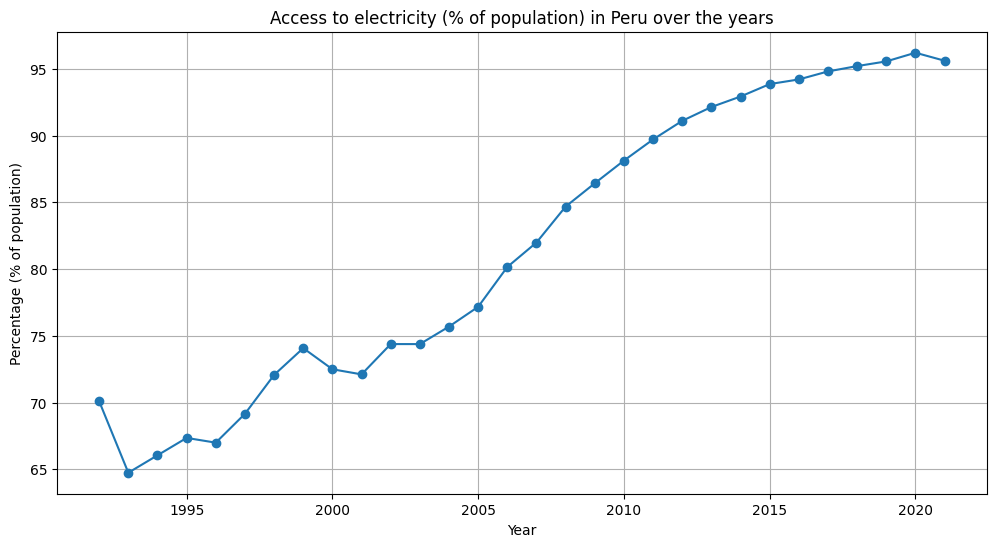

In [49]:
# Muestra el gráfico de la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(electricity_data_peru.index, electricity_data_peru.values, marker='o', linestyle='-')
plt.title('Access to electricity (% of population) in Peru over the years')
plt.xlabel('Year')
plt.ylabel('Percentage (% of population)')
plt.grid(True)
plt.show()

In [78]:
paises_latinoamericanos = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

gdp_growth_latam = data[data['Country Name'].isin(paises_latinoamericanos) & (data['Series Name'] == 'GDP growth (annual %)')]
gdp_growth_latam.index = gdp_growth_latam["Country Name"]

gdp_growth_latam

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,5.42784287621933,-0.852021521903339,-5.30819682539126,10.1302976615431,10.5694333376394,...,2.40532378079436,-2.51261532081394,2.73115982828944,-2.08032784377811,2.81850297775918,-2.61739646282038,-2.00086100285785,-9.9004848136464,10.7180099337095,4.95636996008236
Bolivia,Bolivia,BOL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,2.08929593570468,5.57891785897957,6.79762577697274,3.9565965321577,4.91344195642831,...,6.79601142810841,5.46056950635136,4.85718717971413,4.26392086382113,4.19520633360395,4.22362365271844,2.21670563961031,-8.7378843576993,6.11137272458573,3.60568038279472
Brazil,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,8.60000000000014,6.59999999999992,0.600000000000065,3.39999999999985,2.40000000000001,...,3.00482266944432,0.503955740242247,-3.54576339269425,-3.27591690782192,1.32286905404399,1.783666761634,1.22077782360842,-3.2767587964736,4.98884970066018,2.90053061522693
Chile,Chile,CHL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,5.24527188445649,4.02668562348731,5.84014013990728,2.55722053848815,0.950272505285838,...,3.30850824469113,1.79264947361806,2.15194249853634,1.75303874553305,1.35769537797211,3.99002947521676,0.743130031576072,-6.14524685814565,11.7374310662749,2.44040340034618
Colombia,Colombia,COL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,5.08921698439107,5.41188961342047,3.28670755407101,6.16694132350723,3.60001138983772,...,5.13399351995672,4.49903000110972,2.95590137527523,2.08738250162794,1.35936086788746,2.56432428277704,3.18685539245533,-7.25229907492306,11.0161932669779,7.25656287393603
Costa Rica,Costa Rica,CRI,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,1.8792765563641,5.44239137528237,6.89892344200918,3.65904831414015,8.1905275942481,...,2.49476611386375,3.54210987593986,3.65208096806472,4.20432325432709,4.15769896239459,2.61590440285156,2.41751181706449,-4.27335432054194,7.93576224703865,4.55149177962382
Cuba,Cuba,CUB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,2.74760256257211,1.04757663187654,4.4383335888395,0.512843095700745,1.80979177212284,2.24794854086232,-0.163087223606624,-10.9490846048862,1.25369342501311,1.77485399483382
Dominican Republic,Dominican Republic,DOM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,-2.31324874995225,17.0472409333001,6.50290263397363,6.76486511640712,-12.4818339161577,...,4.87520509332271,7.05046368965911,6.9270187716221,6.65920026269582,4.66670467732366,6.98252758458058,5.05216802016253,-6.72023937283404,12.2719902347896,4.85832403582451
Ecuador,Ecuador,ECU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,5.12441487941237,4.91914694165037,2.10636824681136,7.40724536151613,3.27508248832193,...,4.94651126690626,3.78886854920833,0.0988726083462694,-1.22638398463879,2.36838652633651,1.28929193290502,0.0121051028476558,-7.78760709093422,4.23525124172572,2.94766863298817


In [79]:
gdp_growth_latam = gdp_growth_latam.drop(columns=['Country Name', 'Country Code', 'Series Name', 'Series Code']).T


gdp_growth_latam = gdp_growth_latam.apply(pd.to_numeric, errors='coerce') 

gdp_growth_latam = gdp_growth_latam.dropna()


gdp_growth_latam.index = gdp_growth_latam.index.str.extract('(\d+)')[0].astype(int)



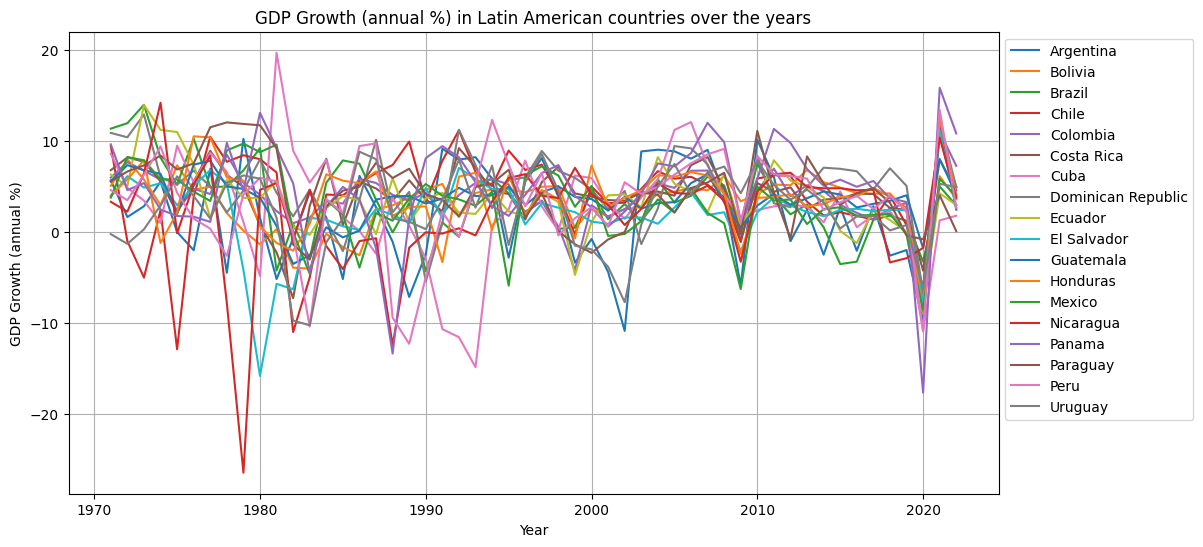

In [80]:
plt.figure(figsize=(12, 6))
for country in gdp_growth_latam.columns:
    plt.plot(gdp_growth_latam.index, gdp_growth_latam[country], label=country)

plt.title('GDP Growth (annual %) in Latin American countries over the years')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()